In [1]:
!pip install xarray
!pip install rioxarray

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for rioxarray: filename=rioxarray-0.3.1-py3-none-any.whl size=49120 sha256=ab0b59acde4c36ed9ff33330a9696f7d8abbef4cf50d98974ea412acad67c672
  Stored in directory: c:\users\pjordon2\appdata\local\pip\cache\wheels\19\a8\97\d4e92b5e8de2c58927038ae4397b7c884989119f10097cef35
Successfully built rioxarray


In [1]:
import rasterio, fiona
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas
from rasterio.mask import mask
import pandas as pd
import numpy as np
import json
import matplotlib.patches as mpatches
import matplotlib.colors
from scipy.signal import medfilt2d
from rasterstats import zonal_stats
import rioxarray
import xarray
import glob

,Shape_Leng,Shape_Area,ADM0_ES,ADM0_PCODE,ADM0_REF,ADM0ALT1ES,ADM0ALT2ES,date,validOn,validTo,geometry
0,354.605876,173.513956,México,MX,Mexico,None,None,2018-02-02,2020-06-18,None,"MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ..."


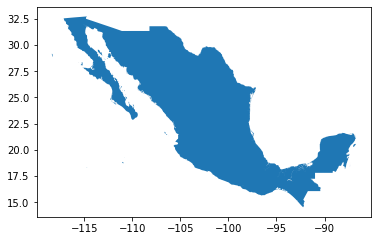

In [2]:
#Getting shape file for mexico districts (municipalities)
path_shape = r"C:\Users\pjordon2\Box\UIUC\6 year\ACE_592_big_data\Project\Pollution_Sp21\Data\boundary_shp"
mex_district = geopandas.read_file(path_shape+"/mex_admbnda_adm2_govmex_20200618.shp") 
mexico = geopandas.read_file(path_shape+"/mex_admbnda_adm0_govmex_20200618.shp")
mexico.plot()
mexico

In [4]:
list_tif = glob.glob(r"C:\Users\pjordon2\Box\UIUC\6 year\ACE_592_big_data\Project\Pollution_Sp21\Data\chirps\*.tif")
index_ = list_tif[0].index("20")
print(index_)


92


In [6]:
list_tif

['C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_592_big_data\\Project\\Pollution_Sp21\\Data\\chirps\\CHIRP.2009.01.tif',
 'C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_592_big_data\\Project\\Pollution_Sp21\\Data\\chirps\\CHIRP.2009.02.tif',
 'C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_592_big_data\\Project\\Pollution_Sp21\\Data\\chirps\\CHIRP.2009.03.tif',
 'C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_592_big_data\\Project\\Pollution_Sp21\\Data\\chirps\\CHIRP.2009.04.tif',
 'C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_592_big_data\\Project\\Pollution_Sp21\\Data\\chirps\\CHIRP.2009.05.tif',
 'C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_592_big_data\\Project\\Pollution_Sp21\\Data\\chirps\\CHIRP.2009.06.tif',
 'C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_592_big_data\\Project\\Pollution_Sp21\\Data\\chirps\\CHIRP.2009.07.tif',
 'C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_592_big_data\\Project\\Pollution_Sp21\\Data\\chirps\\CHIRP.2009.08.tif',
 'C:\\Users\\pjordon2\\Box\\UIUC\\6 year\\ACE_59